#### 분석주제 : 배철수 음악캠프 선곡 트렌드 분석(2006.1.1 ~ 2016.6.30)
#### 분석데이터 
     (1) 배켐 최근 10년간 선곡표(MBC홈페이지 웹크롤링) : 6만여곡(일자, 아티스트명, 곡명)
     (2) 아티스트별 장르 데이터(위키피디아에서 아티스트별 장르 크롤링 후 엑셀 수작업 정리) : 5,246명(누락 데이터 일부 있음)
     (3) 기상청 서울시 강수량 데이터
     (4) 날짜 추가 데이터 생성 : 월, 요일, 계절
#### 분석내용
     (1) 아티스트 트렌드 분석
     (2) 노래별 트렌드 분석
     (3) 장르별 트렌드 분석
     (4) 아티스트 집중 분석 : TOP, 특정 아티스트 

In [31]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams, style
style.use('ggplot')
matplotlib.rc('font', family='Malgun Gothic')    # family='New Gulim' 
# import seaborn as sns
import pprint

In [3]:
# 분석용 파일 읽기
df = pd.read_pickle('bmcamp.pkl')
df.head()

,DT,artist,music,num,ymd,YYYYMM,artist_new,genre,genre_group,music_new,date,year,month,season,weekday,rains,rains_group
0,2016년 6월 30일 목요일,Rihanna,Umbrella (Feat. Jay-Z),1,2016-06-30,2016-06,Rihanna,R&B,R&B,Umbrella (Feat. Jay-Z) by Rihanna,2016-06-30,2016,6,여름,3,0.2,rains_00
1,2016년 6월 30일 목요일,The Bangles,Walk Like An Egyption,2,2016-06-30,2016-06,The Bangles,Pop rock,Pop,Walk Like An Egyption by The Bangles,2016-06-30,2016,6,여름,3,0.2,rains_00
2,2016년 6월 30일 목요일,The Clash,Rock The Casbah,3,2016-06-30,2016-06,The Clash,Punk rock,Rock,Rock The Casbah by The Clash,2016-06-30,2016,6,여름,3,0.2,rains_00
3,2016년 6월 30일 목요일,Van Halen,Why Can'T This Be Love,4,2016-06-30,2016-06,Van Halen,Hard rock,Rock,Why Can'T This Be Love by Van Halen,2016-06-30,2016,6,여름,3,0.2,rains_00
4,2016년 6월 30일 목요일,Red Hot Chili Peppers,The Adventures Of Rain Dance Maggie,5,2016-06-30,2016-06,Red Hot Chili Peppers,Funk rock,Rock,The Adventures Of Rain Dance Maggie by Red Hot...,2016-06-30,2016,6,여름,3,0.2,rains_00


#### 아티스트 순위표 작성

1.연도별 2.계절 3.요일 4.연초/연말/휴가시즌 5.강수량 6. 장르별

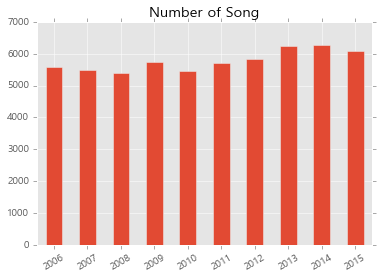

In [32]:
# 연도별 선곡수 (2016년 제외)
def make_chart_music(titles):
    t = df[df['year'] <= 2015].year.value_counts().sort_index()
    ax = t.plot(rot=30, title=titles, kind='bar')
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
make_chart_music(titles='Number of Song')

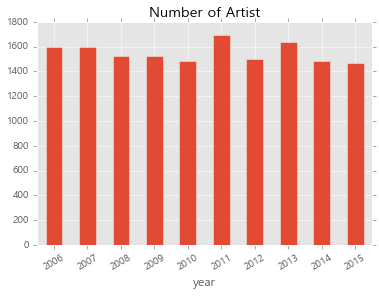

In [33]:
# 연도별 아티스트 수
def make_chart_artist(titles):
    t = df.loc[ df['year'] <= 2015, ['year', 'artist_new'] ].drop_duplicates().groupby('year').size()
    ax = t.plot(rot=30, title=titles, kind='bar')
    ax.set_xticklabels(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
make_chart_artist(titles='Number of Artist')

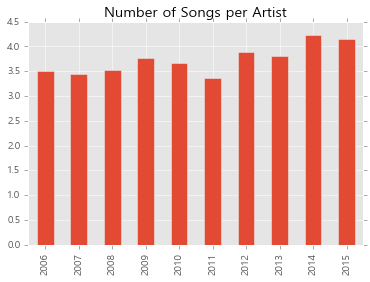

In [34]:
# 아티스트 당 곡수 = 곡수 / 아티스트수 ==> 막대그래프 
def make_chart_m_a(titles):
    music_cnt = df[df['year'] <= 2015].year.value_counts().sort_index()
    artist_cnt = df.loc[ df['year'] <= 2015, ['year', 'artist_new'] ].drop_duplicates().groupby('year').size()
    m_a = music_cnt / artist_cnt
    m_a.plot(kind='bar', title=titles)
make_chart_m_a('Number of Songs per Artist')

In [17]:
# 연도로 필터링 => 아티스트 상위 10명
df_nn = df[df['artist_new'] != 'Nan']  # 아티스트명 결측값 제외(순위에 잡힘)

def yearTOP10(year):
    return df_nn[df_nn['year'] == year].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for y  in np.arange(2006,2017):
    rank_dict[y] = list(yearTOP10(y))
    
DataFrame(rank_dict).set_index(np.arange(1,11))

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,The Beatles,Chicago,Deep Purple,The Beatles,Elton John,Led Zeppelin,The Beatles,Elvis Presley,The Rolling Stones,Taylor Swift,The Beatles
2,Bee Gees,Eric Clapton,Neil Diamond,Marvin Gaye,Michael Jackson,Madonna,Maroon 5,Queen,Rihanna,The Beatles,David Bowie
3,Gnarls Barkley,Ccr,The Beatles,The Black Eyed Peas,Billy Joel,Adele,Adele,Pink,Maroon 5,Rod Stewart,Prince
4,Abba,David Bowie,Bob Dylan,Whitney Houston,Janet Jackson,Bruno Mars,Whitney Houston,Bruno Mars,Coldplay,Michael Jackson,Adele
5,The Beach Boys,James Brown,Eagles,Lady Gaga,The Beatles,Maroon 5,Jason Mraz,Prince,Queen,Maroon 5,Eagles
6,Beyonce,Mika,Queen,Aretha Franklin,Rihanna,Rihanna,Paul Mccartney,Macklemore & Ryan Lewis,The Beatles,Mark Ronson,Coldplay
7,Paul Anka,Bon Jovi,Celine Dion,Queen,Queen,The Beatles,Metallica,The Beatles,Santana,The Weeknd,Rihanna
8,Aerosmith,Carpenters,Def Leppard,Daryl Hall & John Oates,Jethro Tull,Coldplay,Fun.,Robin Thicke,Taylor Swift,U2,Michael Jackson
9,The Pussycat Dolls,Alice Cooper,Jason Mraz,Michael Jackson,Ke$Ha,Michael Jackson,Rihanna,Justin Timberlake,Michael Jackson,Sting,Twenty One Pilots
10,Stevie Wonder,Ray Charles,The Doors,Beyonce,Tom Jones,John Lennon,Olivia Newton-John,Daft Punk,Adele,Queen,Justin Bieber


In [18]:
# 월별로 필터링 => 아티스트 상위 10명
df_nn = df[df['artist_new'] != 'Nan']  # 아티스트명 결측값 제외(순위에 잡힘)

def MonthTOP10(month):
    return df_nn[df_nn['month'] == month].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in np.arange(1,13):
    rank_dict[m] = list(MonthTOP10(m))
    
DataFrame(rank_dict).set_index(np.arange(1,11))

,1,2,3,4,5,6,7,8,9,10,11,12
1,Led Zeppelin,David Bowie,The Beatles,The Beatles,The Beatles,Michael Jackson,Elton John,The Beatles,The Beatles,Elvis Presley,Taylor Swift,Queen
2,David Bowie,Whitney Houston,Michael Jackson,Queen,Billy Joel,Coldplay,The Rolling Stones,The Beach Boys,Eric Clapton,Madonna,Prince,Rihanna
3,Taylor Swift,Led Zeppelin,Deep Purple,Rihanna,Aretha Franklin,The Beatles,Chicago,Pink Floyd,Elvis Presley,Bee Gees,Bob Dylan,Whitney Houston
4,The Beatles,Michael Jackson,Abba,Metallica,Pink,The Rolling Stones,Maroon 5,Chicago,Queen,Santana,Eagles,Taylor Swift
5,Beyonce,Stevie Wonder,Britney Spears,Deep Purple,Rihanna,Elton John,The Beach Boys,Tom Jones,Daryl Hall & John Oates,The Beatles,The Beatles,Ccr
6,Bon Jovi,Queen,Fleetwood Mac,Santana,Queen,Rod Stewart,Celine Dion,Queen,Maroon 5,Queen,Maroon 5,Adele
7,Michael Jackson,Adele,Queen,Michael Jackson,Jethro Tull,Neil Diamond,Queen,Coldplay,Michael Jackson,Maroon 5,Rihanna,U2
8,Queen,Eagles,John Lennon,Def Leppard,Santana,Rihanna,The Beatles,Sting,Jason Mraz,Duran Duran,Barry Manilow,Michael Jackson
9,Rihanna,The Beatles,Coldplay,Billy Joel,George Michael,Ray Charles,Grand Funk Railroad,Green Day,Styx,David Bowie,Commodores,The Beatles
10,Eminem,Beyonce,The Alan Parsons Project,Foreigner,Carpenters,Queen,Rihanna,Barbra Streisand,The Police,Stevie Wonder,Heart,Coldplay


In [19]:
# 계절로 필터링 => 아티스트 상위 10명
df_nn = df[df['artist_new'] != 'Nan']  # 아티스트명 결측값 제외(순위에 잡힘)

def SeasonTOP10(season):
    return df_nn[df_nn['season'] == season].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['봄','여름','가을','겨울']:
    rank_dict[m] = list(SeasonTOP10(m))
    
DataFrame(rank_dict, columns=['봄','여름','가을','겨울']).set_index(np.arange(1,11))

,봄,여름,가을,겨울
1,The Beatles,The Beatles,The Beatles,Queen
2,Michael Jackson,The Rolling Stones,Elvis Presley,David Bowie
3,Queen,Elton John,Queen,Led Zeppelin
4,Rihanna,Coldplay,Maroon 5,Rihanna
5,Billy Joel,Michael Jackson,Taylor Swift,Michael Jackson
6,Deep Purple,Queen,Bee Gees,Taylor Swift
7,Pink,Chicago,Madonna,The Beatles
8,Coldplay,Maroon 5,Santana,Whitney Houston
9,Abba,The Beach Boys,Eric Clapton,Beyonce
10,Santana,Rihanna,Michael Jackson,Adele


In [20]:
# 요일로 필터링 => 아티스트 상위 10명
df_nn = df[df['artist_new'] != 'Nan']  # 아티스트명 결측값 제외(순위에 잡힘)

def weekdayTOP10(weekday):
    return df_nn[df_nn['weekday'] == weekday].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in np.arange(0,7):
    rank_dict[m] = list(weekdayTOP10(m))
    
weekday = DataFrame(rank_dict).set_index(np.arange(1,11))
weekday.columns=['월','화','수','목','금','토','일']
weekday
# 토요일 2부는 차트소개, 일요일 2부는 아티스트 스페셜 효과 반영

,월,화,수,목,금,토,일
1,Queen,Queen,The Beatles,The Beatles,The Beatles,Rihanna,The Beatles
2,Coldplay,Stevie Wonder,Queen,Coldplay,Michael Jackson,Taylor Swift,Elvis Presley
3,The Beatles,The Beatles,Muse,Michael Jackson,Queen,Katy Perry,Led Zeppelin
4,Maroon 5,Maroon 5,Coldplay,Queen,Coldplay,Beyonce,Elton John
5,Michael Jackson,Coldplay,Maroon 5,Mika,Abba,Maroon 5,Michael Jackson
6,Jason Mraz,Bruno Mars,Michael Jackson,Muse,Jason Mraz,Adele,Deep Purple
7,Stevie Wonder,Michael Jackson,Adele,U2,Mika,Mariah Carey,David Bowie
8,Chicago,Jason Mraz,Mika,Led Zeppelin,Billy Joel,Flo Rida,Eagles
9,David Bowie,Adele,Santana,Green Day,David Bowie,The Beatles,Billy Joel
10,Billy Joel,Mika,Madonna,Jason Mraz,Green Day,Bruno Mars,Bee Gees


In [21]:
# 강수량 그룹으로 필터링 => 아티스트 상위 10명
df_nn = df[df['artist_new'] != 'Nan']  # 아티스트명 결측값 제외(순위에 잡힘)

def rainsTOP10(rains_group):
    return df_nn[df_nn['rains_group'] == rains_group].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['rains_50', 'rains_20', 'rains_00', 'rains_no']:
    rank_dict[m] = list(rainsTOP10(m))
  
rain = DataFrame(rank_dict).set_index(np.arange(1,11)) 
rain.columns = ['강수량 1-20m', '강수량 20-50m', '강수량50m초과', '강수량 없음']  # 서울 기준 일 강수량
rain

,강수량 1-20m,강수량 20-50m,강수량50m초과,강수량 없음
1,The Beatles,The Beatles,Maroon 5,The Beatles
2,Queen,Rihanna,The Beatles,Queen
3,Coldplay,Michael Jackson,The Doors,Michael Jackson
4,Michael Jackson,Sting,Celine Dion,Maroon 5
5,Elton John,Queen,Chet Atkins,Rihanna
6,Rihanna,John Lennon,Janis Joplin,Billy Joel
7,Maroon 5,Phil Collins,Rihanna,Led Zeppelin
8,Chicago,Nickelback,Grand Funk Railroad,Coldplay
9,Led Zeppelin,Diana Ross,Led Zeppelin,David Bowie
10,Madonna,Coldplay,Coldplay,Stevie Wonder


In [22]:
# 장르로 필터링 => 아티스트 상위 10명
def GenreTOP10(genre):
    return df[df['genre_group'] == genre].groupby('artist_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['Rock', 'Pop', 'R&B', 'Jazz', 'Hip hop', 'Folk', 'Country', 'Electronic', 'Dance']:
    rank_dict[m] = list(GenreTOP10(m))
    
DataFrame(rank_dict, 
          columns=['Rock', 'Pop', 'R&B', 'Jazz', 'Hip hop', 'Folk', 'Country', 'Electronic', 'Dance']).set_index(np.arange(1,11))

,Rock,Pop,R&B,Jazz,Hip hop,Folk,Country,Electronic,Dance
1,The Beatles,Michael Jackson,Rihanna,George Benson,Eminem,Bob Dylan,Taylor Swift,Lady Gaga,Donna Summer
2,Queen,Maroon 5,Stevie Wonder,Herb Alpert,Flo Rida,Simon & Garfunkel,Lady Antebellum,Daft Punk,Kc & The Sunshine Band
3,Coldplay,Madonna,Beyonce,Fourplay,Kanye West,Joni Mitchell,Leann Rimes,Calvin Harris,Andy Gibb
4,Led Zeppelin,Adele,Bruno Mars,Jamie Cullum,Pitbull,Paul Simon,Glen Campbell,Owl City,Santa Esmeralda
5,Billy Joel,Bee Gees,Mariah Carey,Norah Jones,Macklemore & Ryan Lewis,John Denver,Carrie Underwood,Mark Ronson,Chic
6,Elton John,Jason Mraz,Whitney Houston,Al Jarreau,B.O.B,Leonard Cohen,Dolly Parton,Avicii,Irene Cara
7,David Bowie,Mika,"Earth, Wind & Fire",Chuck Mangione,Nelly,Of Monsters And Men,Kenny Rogers,David Guetta,London Boys
8,Chicago,Abba,John Legend,Kool & The Gang,Pharrell Williams,James Taylor,Rascal Flatts,Moby,Selena Gomez
9,U2,Pink,Ne-Yo,Louis Armstrong,Drake,Jim Croce,Zac Brown Band,Clean Bandit,Shakatak
10,Santana,Katy Perry,Jennifer Lopez,Herbie Hancock,Timbaland,"Peter, Paul & Mary",Brian Hyland,Enigma,Dead Or Alive


#### 노래별 순위표 작성

1.연도별 2.계절 3.요일 4.연초/연말/휴가시즌 5.강수량 6. 장르별

In [23]:
# 연도로 필터링 => 상위 10곡
df_nn = df[ ~df['artist'].isin(['Nan', 'Vienna Symphonic Orchestra'])]   # 결측값, 오프닝송 제외

def yearTOP10(year):
    return df_nn[df_nn['year'] == year].groupby('music_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for y  in np.arange(2006,2017):
    rank_dict[y] = list(yearTOP10(y))
    
DataFrame(rank_dict).set_index(np.arange(1,11))

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Crazy by Gnarls Barkley,Grace Kelly by Mika,Mercy by Duffy,Poker Face by Lady Gaga,"Hey, Soul Sister by Train",Someone Like You by Adele,Somebody That I Used To Know by Gotye Feat. Ki...,Blurred Lines by Robin Thicke Feat. T.I. & Pha...,All About That Bass by Meghan Trainor,Uptown Funk (Feat. Bruno Mars) by Mark Ronson,Love Yourself by Justin Bieber
2,Bad Day by Daniel Powter,What I'Ve Done by Linkin Park,I Kissed A Girl by Katy Perry,I Gotta Feeling by The Black Eyed Peas,Need You Now by Lady Antebellum,Rolling In The Deep by Adele,One More Night by Maroon 5,Royals by Lorde,Happy by Pharrell Williams,See You Again (폴 워커 추모 엔딩곡) by Wiz Khalifa,Cake By The Ocean by Dnce
3,Dani California by Red Hot Chili Peppers,Umbrella by Rihanna Feat. Jay-Z,Viva La Vida by Coldplay,Boom Boom Pow by The Black Eyed Peas,Just The Way You Are by Bruno Mars,Grenade by Bruno Mars,Call Me Maybe by Carly Rae Jepsen,Just Give Me A Reason by Pink Feat. Nate Ruess,Rude by Magic!,Rise by Herb Alpert,Stressed Out by Twenty One Pilots
4,You'Re Beautiful by James Blunt,Beautiful Girls by Sean Kingston,Low by Flo Rida Feat. T-Pain,Love Story by Taylor Swift,Tik Tok by Ke$Ha,Party Rock Anthem (Feat. Lauren Bennett & Goon...,We Are Young by Fun. Feat. Janelle Monae,Radioactive by Imagine Dragons,All Of Me by John Legend,Cheerleader (Felix Jaehn Remix)(Radio Edit) by...,7 Years by Lukas Graham
5,Check On It by Beyonce,Welcome To The Black Parade by My Chemical Rom...,With You by Chris Brown,The Fear by Lily Allen,Nothin' On You by B.O.B Feat. Bruno Mars,We Found Love by Rihanna Feat. Calvin Harris,Diamonds by Rihanna,Can'T Hold Us by Macklemore & Ryan Lewis Feat....,Fancy by Iggy Azalea Feat. Charli Xcx,Take Me To Church by Hozier,Work?(Feat. Drake) by Rihanna
6,Promiscuous by Nelly Furtado,No One by Alicia Keys,I'M Yours by Jason Mraz,My Life Would Suck Without You by Kelly Clarkson,In My Head by Jason Derulo,Moves Like Jagger (Feat.Christina Aguilera) by...,Drive By by Train,Mirrors by Justin Timberlake,Counting Stars by Onerepublic,Want To Want Me by Jason Derulo,One Call Away by Charlie Puth
7,Hips Don'T Lie by Shakira,Makes Me Wonder by Maroon 5,So What by Pink,Halo by Beyonce,Bulletproof by La Roux,Born This Way by Lady Gaga,Ho Hey by The Lumineers,When I Was Your Man by Bruno Mars,Shake It Off by Taylor Swift,Sugar by Maroon 5,Can'T Stop The Feeling! by Justin Timberlake
8,Where'D You Go by Fort Minor,Stronger by Kanye West,Bleeding Love by Leona Lewis,You Belong With Me by Taylor Swift,Rude Boy by Rihanna,On The Floor (Feat. Pitbull) by Jennifer Lopez,Burn It Down by Linkin Park,Wake Me Up by Avicii,Maps by Maroon 5,Immortals by Fall Out Boy,One Dance?(Feat. Wizkid & Kyla) by Drake
9,Over My Head by The Fray,Hey There Delilah by Plain White T'S,Womanizer by Britney Spears,Human by The Killers,Cooler Than Me by Mike Posner,Forget You by Cee Lo Green,Lonely Boy by The Black Keys,Treasure by Bruno Mars,Blank Space by Taylor Swift,Shut Up And Dance by Walk The Moon,Trip Switch by Nothing But Thieves
10,Unwritten by Natasha Bedingfield,Girlfriend by Avril Lavigne,Miss Independent by Ne-Yo,I Don'T Care by Fall Out Boy,Breakeven by The Script,What The Hell by Avril Lavigne,Set Fire To The Rain (Live) by Adele,Roar by Katy Perry,A Sky Full Of Stars by Coldplay,I'M Not The Only One by Sam Smith,Rise by Herb Alpert


In [24]:
# 계절로 필터링 => 상위 10곡
df_nn = df[ ~df['artist'].isin(['Nan', 'Vienna Symphonic Orchestra'])]   # 결측값, 오프닝송 제외

def SeasonTOP10(season):
    return df_nn[df_nn['season'] == season].groupby('music_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['봄','여름','가을','겨울']:
    rank_dict[m] = list(SeasonTOP10(m))
    
DataFrame(rank_dict, columns=['봄','여름','가을','겨울']).set_index(np.arange(1,11))

,봄,여름,가을,겨울
1,Bad Day by Daniel Powter,Blurred Lines by Robin Thicke Feat. T.I. & Pha...,Royals by Lorde,Blank Space by Taylor Swift
2,Crazy by Gnarls Barkley,Viva La Vida by Coldplay,One More Night by Maroon 5,Uptown Funk (Feat. Bruno Mars) by Mark Ronson
3,Somebody That I Used To Know by Gotye Feat. Ki...,Crazy by Gnarls Barkley,Someone Like You by Adele,Irreplaceable by Beyonce
4,We Are Young by Fun. Feat. Janelle Monae,Call Me Maybe by Carly Rae Jepsen,All About That Bass by Meghan Trainor,Tik Tok by Ke$Ha
5,Just Give Me A Reason by Pink Feat. Nate Ruess,Umbrella by Rihanna Feat. Jay-Z,Counting Stars by Onerepublic,Grenade by Bruno Mars
6,Uptown Funk (Feat. Bruno Mars) by Mark Ronson,I Kissed A Girl by Katy Perry,Crazy by Gnarls Barkley,Take Me To Church by Hozier
7,The Reason by Hoobastank,I Gotta Feeling by The Black Eyed Peas,So What by Pink,No One by Alicia Keys
8,Put Your Records On by Corinne Bailey Rae,The Reason by Hoobastank,Just The Way You Are by Bruno Mars,Thinking Out Loud by Ed Sheeran
9,Radioactive by Imagine Dragons,Rude by Magic!,Welcome To The Black Parade by My Chemical Rom...,Ho Hey by The Lumineers
10,Boom Boom Pow by The Black Eyed Peas,Chasing Cars by Snow Patrol,No One by Alicia Keys,Diamonds by Rihanna


In [25]:
# 요일로 필터링 => 상위 10곡
df_nn = df[ ~df['artist'].isin(['Nan', 'Vienna Symphonic Orchestra'])]   # 결측값, 오프닝송 제외

def weekdayTOP10(weekday):
    return df_nn[df_nn['weekday'] == weekday].groupby('music_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in np.arange(0,7):
    rank_dict[m] = list(weekdayTOP10(m))
    
weekday = DataFrame(rank_dict).set_index(np.arange(1,11))
weekday.columns=['월','화','수','목','금','토','일']
weekday
# 토요일 2부는 차트소개, 일요일 2부는 아티스트 스페셜 효과 반영

,월,화,수,목,금,토,일
1,Welcome To The Black Parade by My Chemical Rom...,Crazy by Gnarls Barkley,Crazy by Gnarls Barkley,Viva La Vida by Coldplay,Fix You by Coldplay,Uptown Funk (Feat. Bruno Mars) by Mark Ronson,Stairway To Heaven by Led Zeppelin
2,Bad Day by Daniel Powter,Walk by Foo Fighters,Tik Tok by Ke$Ha,Crazy by Gnarls Barkley,Rise by Herb Alpert,Blurred Lines by Robin Thicke Feat. T.I. & Pha...,Hotel California by Eagles
3,The Way by Fastball,Roar by Katy Perry,Need You Now by Lady Antebellum,Rehab by Amy Winehouse,Human by The Killers,One More Night by Maroon 5,Sultans Of Swing by Dire Straits
4,You Know I'M No Good by Amy Winehouse,Treasure by Bruno Mars,Fireflies by Owl City,Rise by Herb Alpert,Nothin' On You by B.O.B Feat. Bruno Mars,Somebody That I Used To Know by Gotye Feat. Ki...,Piano Man by Billy Joel
5,Because Of You by Ne-Yo,Someone Like You by Adele,Brave by Jennifer Lopez,Welcome To The Black Parade by My Chemical Rom...,Hotel California by Eagles,Royals by Lorde,I Want To Know What Love Is by Foreigner
6,Beautiful Girls by Sean Kingston,Counting Stars by Onerepublic,Starlight by Muse,The Reason by Hoobastank,Shape Of My Heart by Sting,Call Me Maybe by Carly Rae Jepsen,Love Is Like Oxygen by Sweet
7,Sing by Travis,Hero by Family Of The Year,Counting Stars by Onerepublic,Better Together by Jack Johnson,Crazy by Gnarls Barkley,I Gotta Feeling by The Black Eyed Peas,The Reason by Hoobastank
8,Smells Like Teen Spirit by Nirvana,You Give Me Something by James Morrison,Closer by Travis,Stronger by Kelly Clarkson,It'S My Life by Bon Jovi,Someone Like You by Adele,Goodbye To Romance by Ozzy Osbourne
9,Crazy by Gnarls Barkley,Geek In The Pink by Jason Mraz,Rise by Herb Alpert,Time Is Running Out by Muse,Can'T Fight The Moonlight by Leann Rimes,All About That Bass by Meghan Trainor,Africa by Toto
10,Chasing Cars by Snow Patrol,Dance With My Father by Luther Vandross,Chasing Cars by Snow Patrol,How To Save A Life by The Fray,Burn by Deep Purple,Blank Space by Taylor Swift,Enter Sandman by Metallica


In [26]:
# 강수량 그룹으로 필터링 => 아티스트 상위 10명
df_nn = df[ ~df['artist'].isin(['Nan', 'Vienna Symphonic Orchestra'])]   # 결측값, 오프닝송 제외

def rainsTOP10(rains_group):
    return df_nn[df_nn['rains_group'] == rains_group].groupby('music_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['rains_50', 'rains_20', 'rains_00', 'rains_no']:
    rank_dict[m] = list(rainsTOP10(m))
  
rain = DataFrame(rank_dict).set_index(np.arange(1,11))
rain.columns = ['강수량 1-20m', '강수량 20-50m', '강수량50m초과', '강수량 없음']  # 서울 기준 일 강수량
rain

,강수량 1-20m,강수량 20-50m,강수량50m초과,강수량 없음
1,Viva La Vida by Coldplay,Crazy by Gnarls Barkley,Crazy by Gnarls Barkley,Crazy by Gnarls Barkley
2,Welcome To The Black Parade by My Chemical Rom...,Viva La Vida by Coldplay,Umbrella by Rihanna Feat. Jay-Z,Uptown Funk (Feat. Bruno Mars) by Mark Ronson
3,Rehab by Amy Winehouse,Rain by Uriah Heep,Stairway To Heaven by Led Zeppelin,Bad Day by Daniel Powter
4,Royals by Lorde,Africa by Toto,Chasing Cars by Snow Patrol,Rise by Herb Alpert
5,Closer by Travis,Fireflies by Owl City,Sultans Of Swing by Dire Straits,Viva La Vida by Coldplay
6,Bad Day by Daniel Powter,Long Goodbyes by Camel,Everybody'S Changing by Keane,Somebody That I Used To Know by Gotye Feat. Ki...
7,Crazy by Gnarls Barkley,Beautiful Girls by Sean Kingston,Blurred Lines by Robin Thicke Feat. T.I. & Pha...,The Reason by Hoobastank
8,Blurred Lines by Robin Thicke Feat. T.I. & Pha...,Fly Away by Lenny Kravitz,People Are Strange by The Doors,Welcome To The Black Parade by My Chemical Rom...
9,Africa by Toto,I Bet You Look Good On The Dancefloor by Arcti...,Bad Day by Daniel Powter,Call Me Maybe by Carly Rae Jepsen
10,Every Breath You Take by The Police,What I'Ve Done by Linkin Park,Baby Come Back by Player,Chasing Cars by Snow Patrol


In [27]:
# 장르로 필터링 => 아티스트 상위 10명
def GenreTOP10(genre):
    return df[df['genre_group'] == genre].groupby('music_new').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['Rock', 'Pop', 'R&B', 'Jazz', 'Hip hop', 'Folk', 'Country', 'Electronic', 'Dance']:
    rank_dict[m] = list(GenreTOP10(m))
    
DataFrame(rank_dict, 
          columns=['Rock', 'Pop', 'R&B', 'Jazz', 'Hip hop', 'Folk', 'Country', 'Electronic', 'Dance']).set_index(np.arange(1,11))

,Rock,Pop,R&B,Jazz,Hip hop,Folk,Country,Electronic,Dance
1,Viva La Vida by Coldplay,Bad Day by Daniel Powter,Crazy by Gnarls Barkley,Rise by Herb Alpert,Whistle by Flo Rida,Ho Hey by The Lumineers,Need You Now by Lady Antebellum,Uptown Funk (Feat. Bruno Mars) by Mark Ronson,Le Freak by Chic
2,Welcome To The Black Parade by My Chemical Rom...,Rolling In The Deep by Adele,Just The Way You Are by Bruno Mars,Don'T Know Why by Norah Jones,Happy by Pharrell Williams,Little Talks by Of Monsters And Men,Blank Space by Taylor Swift,Fireflies by Owl City,Hot Stuff by Donna Summer
3,The Reason by Hoobastank,Call Me Maybe by Carly Rae Jepsen,Umbrella by Rihanna Feat. Jay-Z,Feels So Good by Chuck Mangione,Lose Yourself by Eminem,Let Her Go by Passenger,Love Story by Taylor Swift,Wake Me Up by Avicii,I Will Survive by Gloria Gaynor
4,Chasing Cars by Snow Patrol,We Are Young by Fun. Feat. Janelle Monae,Diamonds by Rihanna,What A Wonderful World by Louis Armstrong,Low by Flo Rida Feat. T-Pain,Both Sides Now by Joni Mitchell,Shake It Off by Taylor Swift,Born This Way by Lady Gaga,I Love It by Icona Pop Feat. Charli Xcx
5,Somebody That I Used To Know by Gotye Feat. Ki...,Counting Stars by Onerepublic,Superstition by Stevie Wonder,Hey Ya! by Outkast,Empire State Of Mind by Jay-Z Feat. Alicia Keys,American Pie by Don Mclean,Can'T Fight The Moonlight by Leann Rimes,Extreme Ways by Moby,Shadow Dancing by Andy Gibb
6,Sultans Of Swing by Dire Straits,Billie Jean by Michael Jackson,Dance With My Father by Luther Vandross,Cherish by Kool & The Gang,Stronger by Kanye West,Year Of The Cat by Al Stewart,You Belong With Me by Taylor Swift,Something About Us by Daft Punk,Don'T Let Me Be Misunderstood by Santa Esmeralda
7,Hotel California by Eagles,How To Save A Life by The Fray,Grenade by Bruno Mars,A Lover'S Concerto by Sarah Vaughan,See You Again (폴 워커 추모 엔딩곡) by Wiz Khalifa,Down On My Knees by Ayo,Chicken Fried by Zac Brown Band,Poker Face by Lady Gaga,Ring My Bell by Anita Ward
8,Royals by Lorde,One More Night by Maroon 5,Halo by Beyonce,Celebration by Kool & The Gang,Happy (Gru`S Theme From Despicable Me 2) by Ph...,Duncan by Paul Simon,We Are Never Ever Getting Back Together by Tay...,Bad Romance by Lady Gaga,You Spin Me Round by Dead Or Alive
9,The Way by Fastball,Lemon Tree by Fool'S Garden,Ordinary People by John Legend,Dream by Priscilla Ahn,Can'T Hold Us by Macklemore & Ryan Lewis Feat....,I Got A Name by Jim Croce,Not Ready To Make Nice by Dixie Chicks,Get Lucky by Daft Punk Feat. Pharrell Williams...,Glad You Came by The Wanted
10,Everybody'S Changing by Keane,Geek In The Pink by Jason Mraz,All Of Me by John Legend,This Masquerade by George Benson,Nothin' On You by B.O.B Feat. Bruno Mars,Bridge Over Troubled Water by Simon & Garfunkel,Just A Kiss by Lady Antebellum,Titanium by David Guetta Feat. Sia,Relax by Frankie Goes To Hollywood


#### 장르 분석
1.장르별 선곡 비중(Pie) 2. 주요 장르별 선곡 추이(Line/Facet)

C:\Users\hanhoman\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


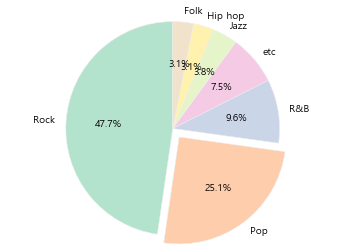

In [35]:
# 1. 장르별 선곡 비중(Pie)
# error 제외, 선곡비중 작은 장르 etc로 재분류
df_genre = df[df['genre_group'] != 'error']
df_genre['genre_group_new'] = np.where(df_genre['genre_group'].isin(['Electronic','Country','Dance','Reggae','Gospel','Classic','OST','New age']),
                                       'etc', df_genre['genre_group'])
# df_genre.ix[20:24, ['genre', 'genre_group', 'genre_group_new']]

df_genre_pct = df_genre['genre_group_new'].value_counts() / len(df_genre) * 100

def genre_pie():
    labels = df_genre_pct.index
    colors = ['#b3e2cd','#fdcdac','#cbd5e8','#f4cae4','#e6f5c9','#fff2ae','#f1e2cc'] # 색 참조 : http://colorbrewer2.org/
    plt.pie(df_genre_pct, labels=labels, colors=colors, autopct='%1.1f%%', 
            explode = (0,0.1,0,0,0,0,0), startangle=90)
    plt.axis('equal')
    
genre_pie()

In [29]:
# 2. 주요 장르별 선곡 비중 추이
df_genre_year = pd.crosstab(df[df['genre_group'] != 'error'].year, df[df['genre_group'] != 'error'].genre_group, margins=True)
df_genre_year.drop(['Classic','Country','Dance','Electronic','Folk','Gospel','New age','OST','Reggae','etc'],
                    axis=1, inplace=True)

df_genre_year['Hip hop%'] = ( df_genre_year['Hip hop'] / df_genre_year['All'] * 100 ).apply(lambda x: "{:,.1f}".format(x))
df_genre_year['Jazz%'] = ( df_genre_year['Jazz'] / df_genre_year['All'] * 100 ).apply(lambda x: "{:,.1f}".format(x))
df_genre_year['Pop%']  = ( df_genre_year['Pop']  / df_genre_year['All'] * 100 ).apply(lambda x: "{:,.1f}".format(x))
df_genre_year['R&B%']  = ( df_genre_year['R&B']  / df_genre_year['All'] * 100 ).apply(lambda x: "{:,.1f}".format(x))
df_genre_year['Rock%'] = ( df_genre_year['Rock'] / df_genre_year['All'] * 100 ).apply(lambda x: "{:,.1f}".format(x))

df_genre_year

genre_group,Hip hop,Jazz,Pop,R&B,Rock,All,Hip hop%,Jazz%,Pop%,R&B%,Rock%
year,,,,,,,,,,,
2006,112,269,1189,482,2585,5076,2.2,5.3,23.4,9.5,50.9
2007,147,209,1048,473,2522,4878,3.0,4.3,21.5,9.7,51.7
2008,145,194,1188,452,2410,4845,3.0,4.0,24.5,9.3,49.7
2009,167,183,1282,651,2493,5309,3.1,3.4,24.1,12.3,47.0
2010,180,181,1145,559,2566,5089,3.5,3.6,22.5,11.0,50.4
2011,199,226,1373,489,2361,5191,3.8,4.4,26.4,9.4,45.5
2012,157,164,1387,508,2705,5481,2.9,3.0,25.3,9.3,49.4
2013,206,219,1441,539,2639,5738,3.6,3.8,25.1,9.4,46.0
2014,153,179,1524,470,2469,5398,2.8,3.3,28.2,8.7,45.7


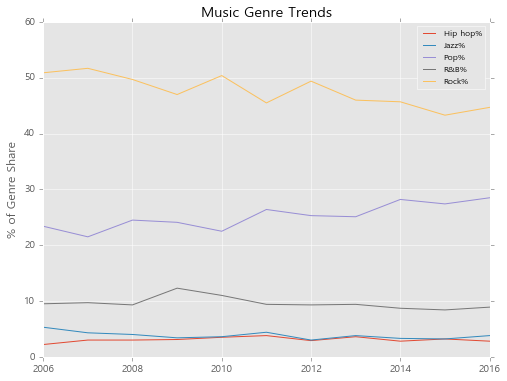

In [38]:
def genre_line():
    for x in np.arange(6,11):
        plt.plot(df_genre_year.ix[:11,x], label=df_genre_year.ix[:11,x].name)

    plt.title('Music Genre Trends')
    plt.ylabel('% of Genre Share')
    plt.legend(loc='best', prop={'size':'small'})
    plt.gcf().set_size_inches(8, 6)
    
genre_line()

#### 대표 아티스트 분석

In [39]:
top_artists = ['The Rolling Stones', 'Taylor Swift', 'The Beatles', 'Maroon 5', 'Queen', 'Michael Jackson', 
               'Led Zeppelin', 'Adele', 'Abba', 'Elvis Presley', 'Hoobastank', 'Radiohead']
top_artists.sort(reverse=True)
df_top_artists = df[ df['artist_new'].isin(top_artists) ]

# Artist별 방송수
artist_aircnt = df_top_artists.artist_new.value_counts().sort_index(ascending=False)

# Artist별 Unique곡수로 각기 작업
artist_music_aircnt = df_top_artists[['artist_new','music']].drop_duplicates().artist_new.value_counts().sort_index(ascending=False)

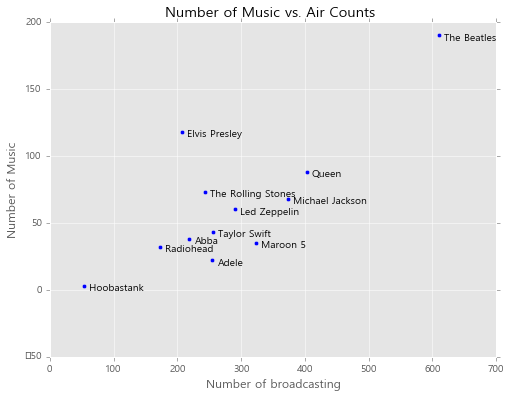

In [45]:
def make_scatter_plot():    
    
    plt.scatter(artist_aircnt, artist_music_aircnt)

    # label each point
    for label, x, y in zip(top_artists, artist_aircnt, artist_music_aircnt):
        plt.annotate(label,
                     xy=(x, y),      # put the label with its point
                     xytext=(5, -5), # but slightly offset, 각 점에 대한 라베링이 떨어진 거리 x축, y축
                     textcoords='offset points')

    plt.title("Number of Music vs. Air Counts ")
    plt.xlabel("Number of broadcasting")
    plt.ylabel("Number of Music")
    plt.gcf().set_size_inches(8, 6)
    plt.show()
make_scatter_plot()

In [48]:
## TOP Artist 선곡 TOP 10
def TOP10(artist):
    return df[df['artist_new'] == artist].groupby('music').size().sort_values(ascending=False)[:10].index
    
rank_dict = {}   # 사전으로 정의 후     

for m in ['The Rolling Stones', 'Taylor Swift', 'The Beatles', 'Maroon 5', 'Queen', 'Michael Jackson', 
               'Led Zeppelin', 'Adele', 'Abba', 'Elvis Presley', 'Radiohead']:
    rank_dict[m] = list(TOP10(m))
    
DataFrame(rank_dict, 
          columns=['The Rolling Stones', 'Taylor Swift', 'The Beatles', 'Maroon 5', 'Queen', 'Michael Jackson', 
               'Led Zeppelin', 'Adele', 'Abba', 'Elvis Presley', 'Radiohead']).set_index(np.arange(1,11))

,The Rolling Stones,Taylor Swift,The Beatles,Maroon 5,Queen,Michael Jackson,Led Zeppelin,Adele,Abba,Elvis Presley,Radiohead
1,Paint It Black,Blank Space,Let It Be,One More Night,Bohemian Rhapsody,Billie Jean,Stairway To Heaven,Rolling In The Deep,Mamma Mia,Suspicious Minds,Creep
2,As Tears Go By,Love Story,All You Need Is Love,This Love,Don'T Stop Me Now,Beat It,Immigrant Song,Someone Like You,The Winner Takes It All,My Boy,High And Dry
3,Ruby Tuesday,Shake It Off,Hey Jude,Makes Me Wonder,Another One Bites The Dust,Man In The Mirror,Whole Lotta Love,Chasing Pavements,Dancing Queen,In The Ghetto,Karma Police
4,Brown Sugar,You Belong With Me,In My Life,Sugar,I Want To Break Free,Black Or White,All My Love,Skyfall,Thank You For The Music,Surrender,Paranoid Android
5,Honky Tonk Women,We Are Never Ever Getting Back Together,A Day In The Life,Maps,Crazy Little Thing Called Love,The Way You Make Me Feel,Babe I'M Gonna Leave You,Make You Feel My Love,Chiquitita,Burning Love,No Surprises
6,Jumpin' Jack Flash,I Knew You Were Trouble,Something,Lucky Strike,Bicycle Race,Thriller,Black Dog,Hello,I Have A Dream,Hound Dog,Fake Plastic Trees
7,Sympathy For The Devil,Mine,Yesterday,Moves Like Jagger,I Was Born To Love You,Smooth Criminal,D'Yer Mak'Er,Set Fire To The Rain (Live),Take A Chance On Me,Anything That'S Part Of You,Nice Dream
8,Angie,Teardrops On My Guitar,I Want To Hold Your Hand,Moves Like Jagger (Feat.Christina Aguilera),Play The Game,Heal The World,Kashmir,Set Fire To The Rain,Happy New Year,Are You Lonesome Tonight?,15 Step
9,(I Can'T Get No) Satisfaction,I Knew You Were Trouble.,The Long And Winding Road,Misery,Radio Ga Ga,Bad,Since I'Ve Been Loving You,When We Were Young,Lay All Your Love On Me,Jailhouse Rock,Exit Music
10,You Can'T Always Get What You Want,Back To December,I Will,Sunday Morning,Too Much Love Will Kill You,Human Nature,Good Times Bad Times,Turning Tables,Slipping Through My Fingers,Heartbreak Hotel,High & Dry


#### 특정 아티스트 방송량 및 순위 검색
1.연도별 선곡횟수(막대그래프) 2.TOP 10 선곡 3. Ranking : 전체 장르 

In [59]:
def my_artist(my_artist):
    my_artist = my_artist.title()  # 첫글자 대문자로 변경
    df_mya = df[df['artist_new'] == my_artist.title() ] 

    # 1 연도별 선곡횟수
    ser = df_mya.year.value_counts().sort_index()
    Series(np.where(ser.index == 2016, ser * 2, ser), index=ser.index).plot(kind='bar')  # 2016년은 2배수
    plt.title("Number of broadcasting : %s" %my_artist)

    #2. TOP 10 선곡
    i = min(df_mya.music.value_counts().size,10)   # 10곡 미만 고려

    top = DataFrame( { 'Song' : df_mya.music.value_counts()[:i].index,
                       'Count' : df_mya.music.value_counts()[:i] },
                       columns=['Song', 'Count'] )
    top.index = np.arange(1,i+1)
    print ("### Top 10 songs of %s ###" %my_artist)
    pprint.pprint(top)

    # 3. ranking 
    rank_master = DataFrame( { 'artist' : df[df['artist_new'] != 'Nan'].artist_new.value_counts().index,
                               'rank' : np.arange( 1, len(df[df['artist_new'] != 'Nan'].artist_new.value_counts())+1 ) } )

    # 3. ranking : genre
    my_genre =  max( df.ix[df.artist_new == my_artist, 'genre_group'][:1] ) 

    rank_master_genre = DataFrame( { 'artist' : df[df['genre_group'] == my_genre].artist_new.value_counts().index,
                                    'rank' : np.arange( 1, len(df[df['genre_group'] == my_genre].artist_new.value_counts())+1 ) } )

    t1 = max( rank_master[rank_master['artist']== my_artist]['rank'].values )
    t2 = format(len(rank_master), ',d')    # format(1234567, ',d')
    t3 = t1 / len(rank_master) * 100
        
    x1 = max( rank_master_genre[rank_master_genre['artist']== my_artist]['rank'].values )
    x2 = format(len(rank_master_genre), ',d')    # format(1234567, ',d')
    x3 = x1 / len(rank_master_genre) * 100
    
    print()
    print("전체순위 : %s위 (아티스트 총 %s명 중 상위 %.1f%%)"  % (t1, t2, t3) )    
    print("%s장르순위 : %s위 (아티스트 총 %s명 중 상위 %.1f%%)"  % (my_genre, x1, x2, x3) )

### Top 10 songs of Metallica ###
                       Song  Count
1             Enter Sandman     33
2        Whiskey In The Jar     23
3         Master Of Puppets     14
4      Nothing Else Matters     10
5                     Orion      9
6            No Leaf Clover      8
7   For Whom The Bell Tolls      8
8            The Unforgiven      7
9        The Memory Remains      7
10            Turn The Page      7

전체순위 : 45위 (아티스트 총 5,245명 중 상위 0.9%)
Rock장르순위 : 25위 (아티스트 총 1,415명 중 상위 1.8%)


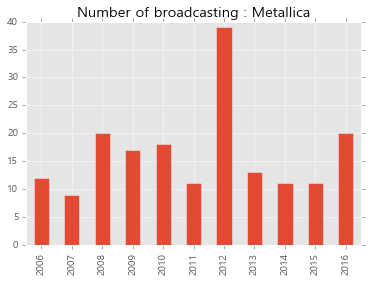

In [60]:
my_artist('Metallica')

#### epilogue
저는 배철수 음악캠프의 열성팬입니다.
팬심 하나로 분석을 시작하였는데, 익숙치않은 파이썬 프로그래밍 실력 때문에 엄청나게 고생했네요.

분석결과에 오류가 있을수도 있고, 코드 또한 미숙하기 짝이 없을 것입니다.

하지만 두 달간의 짧은 학습기간 동안 나름 최선을 다한 성과물을 공유하게 되어 기쁘게 생각합니다.

김영근 강사님 말씀대로 여기서 멈추지 않고 
프로그래밍 실력을 높여 좀 더 가치있고 정돈된 분석으로
배철수 선생님께 헌정하고자 합니다.

끝까지 읽어주셔서 감사합니다. 